# TFM: MACHINE LEARNING
## Degradación de un sistema fotovoltáico 
## Luis Julián García Giménez

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_ni='/Users/LuisGarcia/Desktop/TFM/no_interpolados_no_z_n_cc/'
path_ima='/Users/LuisGarcia/Desktop/TFM/imagenes_no_z_n_cc/ML/'

df1_ni=pd.read_csv(path_ni + 'df1_ni.csv')
df2_ni=pd.read_csv(path_ni + 'df2_ni.csv')
df3_ni=pd.read_csv(path_ni + 'df3_ni.csv')
df4_ni=pd.read_csv(path_ni + 'df4_ni.csv')

#RENOMBRAR COLUMNAS
#media_poa --> poa
#media_temp --> Tcell
df1_ni = df1_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df2_ni = df2_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df3_ni = df3_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})
df4_ni = df4_ni.rename(columns = {"media_poa": "poa" , "media_temp": "Tcell"})


In [137]:
df1_ni

,Timestamp,power,poa,Tcell
0,2013-01-01 08:00:00,39.5549,6.02,1.87
1,2013-01-01 08:15:00,1211.6331,32.03,2.40
2,2013-01-01 08:30:00,5973.3571,53.33,3.20
3,2013-01-01 08:45:00,11922.0651,88.55,3.16
4,2013-01-01 09:00:00,30104.7989,229.69,6.77
...,...,...,...,...
112174,2020-12-31 15:45:00,35152.3820,350.71,23.05
112175,2020-12-31 16:00:00,28141.7409,293.50,21.91
112176,2020-12-31 16:15:00,19683.2489,223.41,20.05
112177,2020-12-31 16:30:00,5446.8400,79.22,15.92


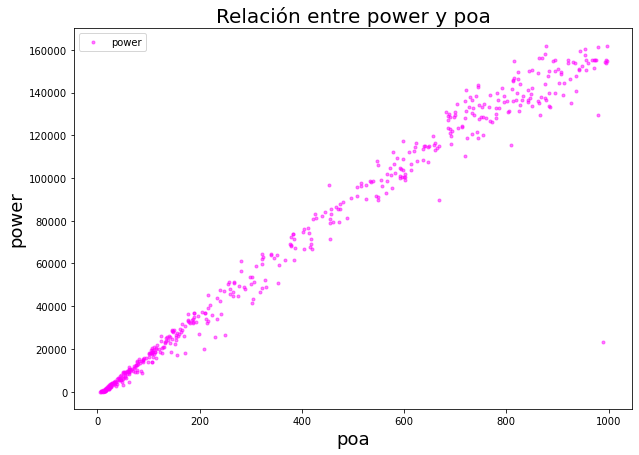

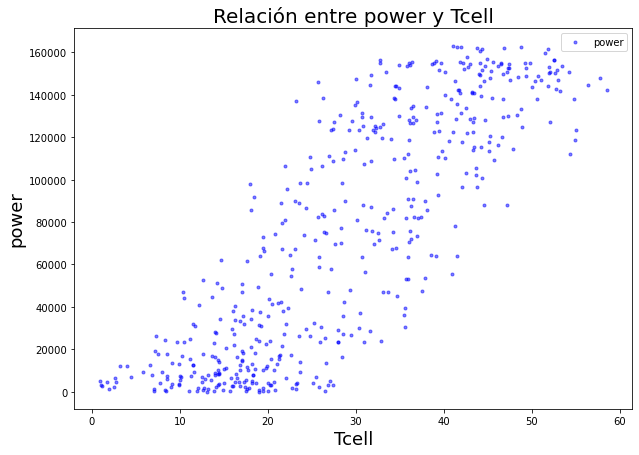

In [138]:
def plotear_500_muestras(df, var):
    
    sample_power = df.sample(500)
    #sample_power = df['power'].sample(5000)
    
    if var == "poa" :
        color='magenta'
    if var == "Tcell" :
        color='blue'
    
    sample_power.plot(style=".", x=var, y='power', color=color, alpha=0.5, figsize=(10, 7))
    plt.title('Relación entre power y ' + var, size=20)
    plt.xlabel(var, size=18)
    plt.ylabel('power', size=18);
    
    nombre_img="plotear_500_muestras_" + var + ".png"
    plt.savefig(path_ima + nombre_img)
    
plotear_500_muestras(df1_ni, "poa")
plotear_500_muestras(df1_ni, "Tcell")

## Valores para predecir

In [139]:
def detectar_power(df, var):
    
    if var == "poa":
        limite1= 290
        limite2= 300
    if var == "Tcell":
        limite1= 20
        limite2= 25
    
    mascara = (df[var] > limite1) & (df[var] <= limite2) 
    pot=df.loc[mascara]
    print("Para cuando " + var + " está entre: " + str(limite1) + "-" + str(limite2) + " la potencia suele ser: ")
    print(pot)
    
detectar_power(df1_ni, "poa")
#detectar_power(df1_ni, "Tcell")

Para cuando poa está entre: 290-300 la potencia suele ser: 
                  Timestamp       power     poa  Tcell
205     2013-01-06 16:00:00  32778.9789  291.93  20.04
295     2013-01-09 11:30:00  57140.8600  297.54  22.03
384     2013-01-11 15:45:00  56604.5640  298.52  17.31
421     2013-01-12 15:30:00  55454.5200  294.14  20.86
487     2013-01-14 13:30:00  59570.6580  296.84  20.60
...                     ...         ...     ...    ...
111928  2020-12-24 10:45:00  51867.0249  293.27  21.20
112022  2020-12-27 09:15:00  31600.7811  299.21  11.34
112124  2020-12-30 11:45:00  49560.4660  294.51  25.82
112127  2020-12-30 12:30:00  53853.8000  298.37  17.81
112175  2020-12-31 16:00:00  28141.7409  293.50  21.91

[985 rows x 4 columns]



Por lo que me quedo con los datos del 2013-01-14 a las 13:30: 

Timestamp:2013-01-14 13:30:00  

Power: 57730.0  

Poa: 296.84 

Tcell: 20.60

Estos valores son los que voy a utilizar para predecir en los modelos que voy a crear, y por lo tanto tener una referencia de si mi predicción tiene sentido y es lo suficientemente precisa o no.

## Regresión Lineal



In [140]:
from sklearn.linear_model import LinearRegression

def graficas_regresion_lineal_simple(df, var):
    print()
    print("Predecir power usando: " + var)
    
    x =df[[var]]
    y =df[["power"]]
    
    #crear scatterplot
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(x, y, 'o')
    ax.set_title('Power vs ' + var , fontsize=14)
    ax.set_ylabel('power', fontsize=14)
    ax.set_xlabel(var, fontsize=14)
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    
    #obtener pendiente y termino independiente de la recta regresión
    
    m=regr.coef_ #pendiente
    n=regr.intercept_ #termino independiente
    
    #añadir la recta al scatterplot
    ax.plot(x, m*x+n) #y=mx+n
    
    nombre_img="graficas_regresion_lineal_simple_" + var + ".png"
    plt.savefig(path_ima + nombre_img)


Predecir power usando: poa


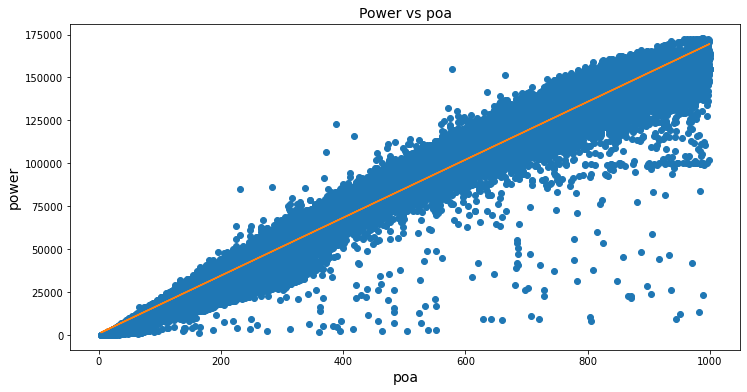

In [141]:
graficas_regresion_lineal_simple(df1_ni, "poa")


Predecir power usando: Tcell


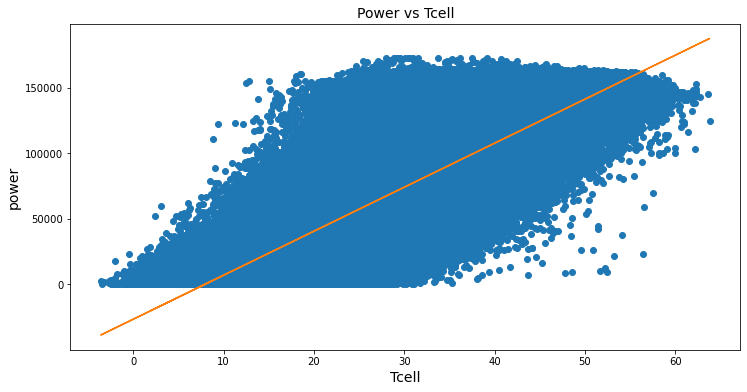

In [142]:
graficas_regresion_lineal_simple(df1_ni, "Tcell")

In [143]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Regresión lineal una variable

def regresion_lineal_simple(df, var):
    print()
    print("Predecir power usando: " + var)
    
    x =df[[var]]
    y =df[["power"]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

    # Creamos el objeto de Regresión Linear
    regr = linear_model.LinearRegression()

    # Entrenamos nuestro modelo
    regr.fit(x_train, y_train)

    #Prediccion que es una línea 
    y_pred = regr.predict(x_test)

    #Coeficiente
    print('Coeficiente: ', regr.coef_)

    # Este es el valor donde corta el eje Y (en X=0)
    print('Termino independiente: ', regr.intercept_)

    #RECTA
    response = regr.predict(x)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, response, color='green', label='Modelo de Regresion')
    ax.scatter(x, y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Muestras')
    ax.set_ylabel('power', fontsize=14)
    ax.set_xlabel(var, fontsize=14)
    ax.legend(facecolor='white', fontsize=11)
    ax.set_title('Power vs ' + var)
    fig.tight_layout()
    
    nombre_img="regresion_lineal_simple_" + var + ".png"
    plt.savefig(path_ima + nombre_img)


    # Error Cuadrado Medio
    mse= mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print("RMSE: %.5f" % rmse)
    
    r2=r2_score(y_test, y_pred)
    print('R^2: %.5f' % r2)
    
    if var == "poa":
        #PREDECIR
        #poa= 296.84 --> power: 57730.0 
        y_predicha = regr.predict([[296.84]])
        print()
        print("Para un poa de 296.84, debería dar alrededor de: power= 57730.0")
        print("Y con poa = 296.84 hemos predicho que da: ", y_predicha)
        
    if var == "Tcell":
        #PREDECIR
        #Tcell= 20.60--> power: 57730.0
        y_predicha = regr.predict([[20.60]])
        print()
        print("Para un Tcell de 20.6, debería dar alrededor de: power= 57730.0")
        print("Y con Tcell= 20.6 hemos predicho que da: ", y_predicha)

    return rmse, r2

#Si tenemos un Error Cuadrático medio muy grande el modelo no será muy bueno
#El R^2 debería ser cercano a 1 para que nuestro modelo realice predicciones con alta precisión

#--------------------------------------------------------------------------------------------------

#Regresión Lineal Múltiple
#Y = b + m1 X1 + m2 X2 + … + m(n) X(n)
#En nuestro caso, utilizaremos 2 “variables predictivas” para poder graficar en 3D,
def regresion_lineal_mul(df):
    print()
    print("Predecir power usando: poa y Tcell" )
    
    x =df[["poa","Tcell"]]
    y =df[["power"]]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    
    
    # Creamos un nuevo objeto de Regresión Lineal
    regr = linear_model.LinearRegression()

    # Entrenamos el modelo, esta vez, con 2 dimensiones
    # obtendremos 2 coeficientes, para graficar un plano
    regr.fit(x_train, y_train)

    # Hacemos la predicción con la que tendremos puntos sobre el plano hallado
    y_pred = regr.predict(x_test)
    
    # Los coeficientes
    print('Coeficientes: ', regr.coef_)
    
    print('Termino independiente: ', regr.intercept_)
    
    # Error Cuadrado Medio
    
    mse= mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print("RMSE: %.5f" % rmse)
    
    # R^2 (siendo 1.0 el mejor posible)

    r2=r2_score(y_test, y_pred)
    print('R^2: %.5f' % r2)
    
    return rmse, r2



## 1 Iteración

------------------------------------------------------------------------------------------

Predecir power usando: poa
Coeficiente:  [[168.57743292]]
Termino independiente:  [929.12605781]
RMSE: 7035.62674
R^2: 0.98257

Para un poa de 296.84, debería dar alrededor de: power= 57730.0
Y con poa = 296.84 hemos predicho que da:  [[50969.65124505]]
------------------------------------------------------------------------------------------

Predecir power usando: Tcell
Coeficiente:  [[3355.21991231]]
Termino independiente:  [-26551.23327073]
RMSE: 32075.04540
R^2: 0.63770

Para un Tcell de 20.6, debería dar alrededor de: power= 57730.0
Y con Tcell= 20.6 hemos predicho que da:  [[42566.29692281]]
------------------------------------------------------------------------------------------

Predecir power usando: poa y Tcell
Coeficientes:  [[ 179.47678708 -324.93271842]]
Termino independiente:  [5828.86070971]
RMSE: 6634.02618
R^2: 0.98450


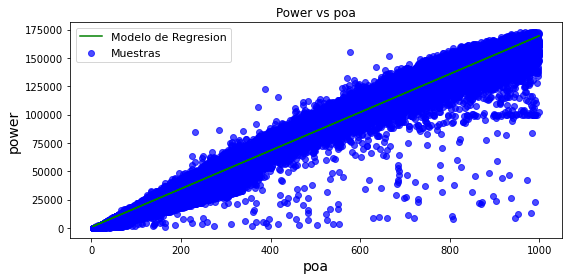

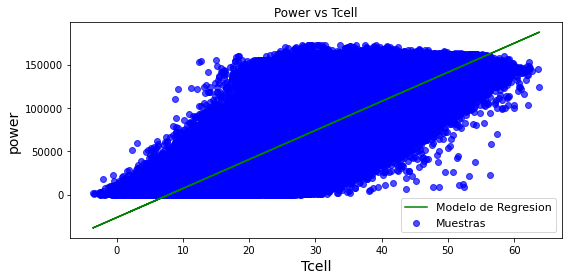

In [144]:
#SOLO 1 EXPERIMENTO

print("------------------------------------------------------------------------------------------")
rmse_poa, r2_poa=regresion_lineal_simple(df1_ni, "poa")
    
print("------------------------------------------------------------------------------------------")
rmse_tcell, r2_tcell=regresion_lineal_simple(df1_ni, "Tcell")

print("------------------------------------------------------------------------------------------")
rmse, r2 = regresion_lineal_mul(df1_ni)


## 30 Iteraciones

In [145]:

import statistics

def regresion_lineal_simple(df, var):

    x =df[[var]]
    y =df[["power"]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)

    mse= mean_squared_error(y_test, y_pred)

    rmse=np.sqrt(mse)
    r2=r2_score(y_test, y_pred)

    return rmse, r2

#--------------------------------------------------------------------------------------------------

def regresion_lineal_mul(df):
    
    x =df[["poa","Tcell"]]
    y =df[["power"]]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    
    mse= mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test, y_pred)

    return rmse, r2


lista_rmse_poa=[]
lista_rmse_tcell=[]
lista_rmse=[]

lista_r2_poa=[]
lista_r2_tcell=[]
lista_r2=[]

for i in range(30):
    
    rmse_poa, r2_poa=regresion_lineal_simple(df1_ni, "poa")
    lista_rmse_poa.append(rmse_poa)
    lista_r2_poa.append(r2_poa)
    #------------------------------------------------------------------------------------------
    rmse_tcell, r2_tcell=regresion_lineal_simple(df1_ni, "Tcell")
    lista_rmse_tcell.append(rmse_tcell)
    lista_r2_tcell.append(r2_tcell)
    #------------------------------------------------------------------------------------------
    rmse, r2 = regresion_lineal_mul(df1_ni)
    lista_rmse.append(rmse)
    lista_r2.append(r2)
    
#POA
media_rmse_poa = statistics.mean(lista_rmse_poa)
media_r2_poa = statistics.mean(lista_r2_poa)

#TCELL
media_rmse_tcell = statistics.mean(lista_rmse_tcell)
media_r2_tcell = statistics.mean(lista_r2_tcell)

#POA Y TCELL
media_rmse = statistics.mean(lista_rmse)
media_r2 = statistics.mean(lista_r2)


print("RMSE POA: ", media_rmse_poa)
print("R2 POA: ", media_r2_poa)

print("---------------------------------")
print("RMSE TCELL: ", media_rmse_tcell)
print("R2 TCELL: ", media_r2_tcell)

print("---------------------------------")
print("RMSE POA Y TCELL: ", media_rmse)
print("R2 POA Y TCELLL: ", media_r2)

RMSE POA:  7035.626744454087
R2 POA:  0.9825682857854449
---------------------------------
RMSE TCELL:  32075.045396978752
R2 TCELL:  0.6376993823362553
---------------------------------
RMSE POA Y TCELL:  6634.026175195952
R2 POA Y TCELLL:  0.9845015282340069


## Random Forest sin parametros



In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statistics

def randomforest_simple_sin_p(df, var):
    print()
    print("Predecir power usando: " + var)
    
    
    x = df[var].values.reshape(-1, 1)
    y = df["power"].values.reshape(-1, 1)
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    
            
    rf=RandomForestRegressor()
    
    rf.fit(x_train, y_train)
    #.values.ravel()

    y_pred=rf.predict(x_test)

    
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print("rmse ", rmse )
    
def randomforest_mul_sin_p(df):
    print()
    print("Predecir power usando: poa y Tcell")
    
    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
    
    rf = RandomForestRegressor()
    
    rf.fit(x_train, y_train)
        

    y_pred = rf.predict(x_test)
    
    mse_rf= mean_squared_error(y_test,y_pred)
    rmse_rf= np.sqrt(mse_rf)
    
    
    print('RMSE: ', rmse_rf)


randomforest_simple_sin_p(df1_ni, "poa")
randomforest_simple_sin_p(df1_ni, "Tcell")

randomforest_mul_sin_p(df1_ni)


Predecir power usando: poa


<ipython-input-146-272f9779cc97>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7315.128582466836

Predecir power usando: Tcell


<ipython-input-146-272f9779cc97>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32367.428931997063

Predecir power usando: poa y Tcell
RMSE:  5632.1091684381945


## Random Forest con parametros

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statistics


def randomforest_simple(df, var, n_estimators):
    print()
    print("Predecir power usando: " + var)
    
    
    x = df[var].values.reshape(-1, 1)
    y = df["power"].values.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)
    

    rf=RandomForestRegressor(n_estimators=n_estimators, criterion='mse', random_state=123, n_jobs=-1)
    rf.fit(x_train, y_train)

    y_pred=rf.predict(x_test)
    
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print("rmse ", rmse )
        
    return rmse

#---------------------------------------------------------------------------------------------------------
def randomforest_mul(df, n_estimators):
    print()
    print("Predecir power usando: poa y Tcell")
    
    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
    

    rf = RandomForestRegressor(n_estimators=n_estimators, criterion='mse', random_state=123, n_jobs=-1)
    
    rf.fit(x_train, y_train)
        
    y_pred = rf.predict(x_test)
    
    mse_rf= mean_squared_error(y_test,y_pred)
    rmse_rf= np.sqrt(mse_rf)
      
    print('RMSE: ', rmse_rf)

    return rmse_rf

## 1 Iteración

### n_estimators = 100

In [148]:
print("1 SOLA ITERACIÓN")
randomforest_simple(df1_ni, "poa", 100)

1 SOLA ITERACIÓN

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7310.482682757263


7310.482682757263

In [149]:
print("1 SOLA ITERACIÓN")
randomforest_simple(df1_ni, "Tcell", 100)

1 SOLA ITERACIÓN

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32429.433151658166


32429.433151658166

In [150]:
print("1 SOLA ITERACIÓN")
randomforest_mul(df1_ni, 100)

1 SOLA ITERACIÓN

Predecir power usando: poa y Tcell
RMSE:  5633.89376514609


5633.89376514609

## 1 Iteración

### n_estimators = 200

In [151]:
print("1 SOLA ITERACIÓN")
randomforest_simple(df1_ni, "poa", 200)

1 SOLA ITERACIÓN

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457


7314.533317266457

In [152]:
print("1 SOLA ITERACIÓN")
randomforest_simple(df1_ni, "Tcell", 200)

1 SOLA ITERACIÓN

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982


32422.412520971982

In [153]:
print("1 SOLA ITERACIÓN")
randomforest_mul(df1_ni, 200)

1 SOLA ITERACIÓN

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618


5618.401159719618

## 30 Iteraciones

In [154]:
lista_rf_rmse_poa=[]
lista_rf_rmse_tcell=[]
lista_rf_rmse=[]

print()
print("-----------------------")
print("30 ITERACIONES")
for i in range(30):
    
    rmse_poa=randomforest_simple(df1_ni, "poa", 200)
    lista_rf_rmse_poa.append(rmse_poa)
    
    
    rmse_tcell=randomforest_simple(df1_ni, "Tcell", 200)
    lista_rf_rmse_tcell.append(rmse_tcell)
    
    rmse =randomforest_mul(df1_ni, 200) 
    lista_rf_rmse.append(rmse)

print("---------------------------------")
#POA
media_rf_rmse_poa = statistics.mean(lista_rf_rmse_poa)
print("RMSE POA: ", media_rf_rmse_poa)
print("---------------------------------")

#TCELL
media_rf_rmse_tcell = statistics.mean(lista_rf_rmse_tcell)
print("RMSE TCELL: ", media_rf_rmse_tcell)
print("---------------------------------")

#POA Y TCELL
media_rf_rmse = statistics.mean(lista_rf_rmse)
print("RMSE POA Y TCELL: ", media_rf_rmse)
print("---------------------------------")


-----------------------
30 ITERACIONES

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618

Predecir power usando: poa


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  7314.533317266457

Predecir power usando: Tcell


<ipython-input-147-b91efb589e7b>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


rmse  32422.412520971982

Predecir power usando: poa y Tcell
RMSE:  5618.401159719618
---------------------------------
RMSE POA:  7314.533317266457
---------------------------------
RMSE TCELL:  32422.412520971982
---------------------------------
RMSE POA Y TCELL:  5618.401159719618
---------------------------------


# Optimización hiperparametros
## Random forest: OOB y RMSE
### n_estimators = 5 , 10, 15, ... , 190, 195, 200
### max_features = 1, 2

In [155]:
# Validación empleando el Out-of-Bag error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def oob_error_n_estimators(df):
    
    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
    
    train_scores = []
    oob_scores   = []
    rmse_lista = []

    # Valores evaluados
    estimator_range = range(5, 200, 5)
    max_features_range=[1,2]
    
    # Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
    # de entrenamiento y de Out-of-Bag.
    for n_estimators in estimator_range:
        for max_features in max_features_range:
            modelo = RandomForestRegressor(
                        n_estimators = n_estimators,
                        criterion    = 'mse',
                        max_features = max_features, 
                        oob_score    = True,
                        n_jobs       = -1,
                        random_state = 123 
                     )
            modelo.fit(x_train, y_train)
            
            
            oob_scores.append(modelo.oob_score_)
            
            
            y_pred = modelo.predict(x_test)
    
            mse_rf= mean_squared_error(y_test,y_pred)
            rmse_rf= np.sqrt(mse_rf)
            rmse_lista.append(rmse_rf)
            
            print("n_estimators", n_estimators)
            print("max_features", max_features)
            
            print("modelo.oob_score_")
            print(modelo.oob_score_)
            
            print("rmse_rf")
            print(rmse_rf)
            print()
    
    print("-------------------------")
    print("maximo oob_scores")
    print(max(oob_scores))
    
    print("minimo rmse")
    print(min(rmse_lista))
    print("-------------------------")

oob_error_n_estimators(df1_ni)

/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 5
max_features 1
modelo.oob_score_
0.7049494965914267
rmse_rf
5939.391277691641



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 5
max_features 2
modelo.oob_score_
0.7044113709101792
rmse_rf
6001.507195971825



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 10
max_features 1
modelo.oob_score_
0.9580512505663838
rmse_rf
5761.7240790543565



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 10
max_features 2
modelo.oob_score_
0.957936299216015
rmse_rf
5822.786634877036



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 15
max_features 1
modelo.oob_score_
0.9843260766343098
rmse_rf
5679.1701961195695



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 15
max_features 2
modelo.oob_score_
0.9839818211182454
rmse_rf
5749.348707854757



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 20
max_features 1
modelo.oob_score_
0.9874571353906094
rmse_rf
5643.947869775104



/Users/LuisGarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


n_estimators 20
max_features 2
modelo.oob_score_
0.9869494073044758
rmse_rf
5708.582937176195

n_estimators 25
max_features 1
modelo.oob_score_
0.987868309692112
rmse_rf
5627.813927188701

n_estimators 25
max_features 2
modelo.oob_score_
0.9874200488291364
rmse_rf
5699.038984478788

n_estimators 30
max_features 1
modelo.oob_score_
0.9880489794947559
rmse_rf
5610.507668806632

n_estimators 30
max_features 2
modelo.oob_score_
0.9875846225207539
rmse_rf
5683.781023287893

n_estimators 35
max_features 1
modelo.oob_score_
0.9882046510785768
rmse_rf
5587.709256442021

n_estimators 35
max_features 2
modelo.oob_score_
0.9877661184169384
rmse_rf
5672.079142334278

n_estimators 40
max_features 1
modelo.oob_score_
0.9882874595911029
rmse_rf
5586.407111956332

n_estimators 40
max_features 2
modelo.oob_score_
0.9878685599924107
rmse_rf
5660.054944230911

n_estimators 45
max_features 1
modelo.oob_score_
0.9883710524146494
rmse_rf
5579.467974930981

n_estimators 45
max_features 2
modelo.oob_score_
0.

## Random forest: número de árboles
### n_estimators = 100 , 200, 300, 400 , 500, 600

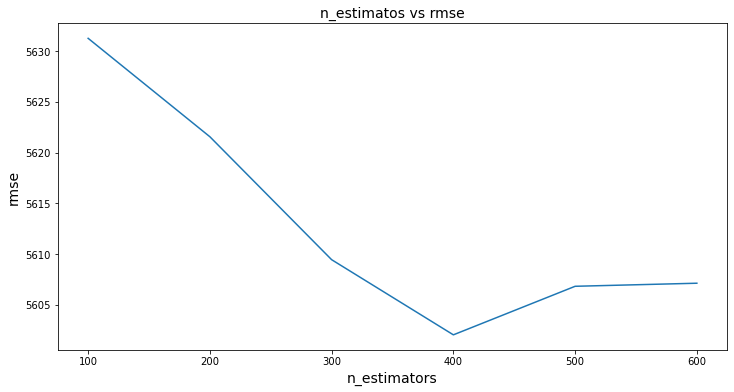

In [156]:
def grafica_n_estimators(lista_itera, lista_rmse, rmse):
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(lista_itera, lista_rmse)
    ax.set_title('n_estimatos vs ' + rmse, fontsize=14)
    ax.set_ylabel(rmse, fontsize=14)
    ax.set_xlabel('n_estimators', fontsize=14)
    
    nombre_img="opt_nestimators" + ".png"
    plt.savefig(path_ima + nombre_img)
        
def opt_nestimators_rf(df, arboles_iniciales, arboles_finales, arboles_salto):
    

    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)
    
    rf = RandomForestRegressor(n_estimators=arboles_iniciales)
    
    lista_rmse=[]
    lista_itera=[]
    
    itera=arboles_iniciales

    while itera <= arboles_finales:
        
        rf.fit(x_train, y_train)
        
        y_pred = rf.predict(x_test)
        
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test=np.sqrt(mse_test)
        
        lista_rmse.append(rmse_test)
        lista_itera.append(itera)
        
        itera += arboles_salto
        rf.n_estimators += arboles_salto
        
    grafica_n_estimators(lista_itera, lista_rmse, "rmse")
    

opt_nestimators_rf(df1_ni, arboles_iniciales=100, arboles_finales=600, arboles_salto=100)

## Out Of Bag Error  hiperparametros óptimos

In [157]:
from sklearn.model_selection import ParameterGrid
#OUT OF BAG ERROR
def oob_error_grid_search(df):
    
    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
    
    # Grid de hiperparámetros evaluados

    param_grid = ParameterGrid(
                    {'n_estimators': [240, 260, 280, 300], #Puede ser que si subo mucho n_estimators, con las pocas características que tengo, sobreajuste mi modelo
                     'max_features': [1, 2], #n_estimators alto --> overfitting
                     'max_depth'   : [8, 9, 10, 12, 14]
                    }
                 )


    resultados = {'params': [], 'oob_r2': []}
    
    for params in param_grid:

        modelo = RandomForestRegressor(oob_score= True, n_jobs = -1, random_state = 123, ** params)

        modelo.fit(x_train, y_train)

        resultados['params'].append(params)
        resultados['oob_r2'].append(modelo.oob_score_)
        

    resultados = pd.DataFrame(resultados)
    resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
    resultados = resultados.drop(columns = 'params')
    resultados = resultados.sort_values('oob_r2', ascending=False)

    
    print("RESULTADOS")
    print(resultados)
    
oob_error_grid_search(df1_ni)

RESULTADOS
      oob_r2  max_depth  max_features  n_estimators
7   0.989902          8             2           300
6   0.989901          8             2           280
5   0.989899          8             2           260
15  0.989899          9             2           300
4   0.989898          8             2           240
14  0.989897          9             2           280
13  0.989895          9             2           260
12  0.989895          9             2           240
19  0.989848         10             1           300
18  0.989841         10             1           280
16  0.989834         10             1           240
17  0.989833         10             1           260
27  0.989825         12             1           300
26  0.989822         12             1           280
25  0.989814         12             1           260
23  0.989807         10             2           300
24  0.989806         12             1           240
22  0.989805         10             2           280
2

## Resultados Out Of Bag Error hiperparametros óptimos


n_estimators=300, max_depth=9, max_features=2


oob-r2= 0.990347

rmse = 5447.68835

## Gridsearch Cross Validation

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

#VALIDACIÓN CRUZADA
def cross_val_grid_search(df):
    
    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
        
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
    
    # Hiperparámetros evaluados
    param_grid = {
                  'n_estimators': [240, 260, 280, 300],
                  'max_features': [1, 2],
                  'max_depth'   : [None, 8,9,10,12,14]
                 }

    # Búsqueda por grid search con validación cruzada
    grid = GridSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
           )

    grid.fit(X = x_train, y = y_train)
        
    print("Mejores hiperparámetros VALIDACIÓN CRUZADA: \n")
    print(grid.best_params_) 

    # Error 
    modelo_final = grid.best_estimator_
    predicciones = modelo_final.predict(X = x_test)
    rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
    
    print("RMSE: ", rmse)
    

cross_val_grid_search(df1_ni)

Mejores hiperparámetros VALIDACIÓN CRUZADA: 

{'max_depth': 8, 'max_features': 2, 'n_estimators': 300}
RMSE:  5252.878813982094


## Resultados Gridsearch Cross Validation
#### neg_root_mean_squared_error
param_grid = {'n_estimators': [100,150,200], 'max_features': [1, 2],'max_depth': [None, 8,9,10,12,14, 20]}


{'max_depth': 9, 'max_features': 2, 'n_estimators': 200}
RMSE:  5448.342382963492

----

param_grid = {'n_estimators': [240, 260, 280, 300],'max_features': [1, 2],'max_depth'   : [None, 8,9,10,12,14]}

{'max_depth': 9, 'max_features': 2, 'n_estimators': 300}
RMSE:  5447.688354200674



## Comprobación de resultados

In [162]:
def randomforest_mul_gs(df, n_estimators, max_depth, max_features):
    print()
    print("Predecir power usando: poa y Tcell")
    
    y = df['power']
    x = df.drop(['Timestamp', 'power'], axis =1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
    

    rf=RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,random_state = 123, oob_score = True, n_jobs= -1)
    
    rf.fit(x_train, y_train)
        
    y_pred = rf.predict(x_test)
    
    mse_rf= mean_squared_error(y_test,y_pred)
    rmse_rf= np.sqrt(mse_rf)
    
    oob=rf.oob_score_
      
    print('RMSE: ', rmse_rf)
    print("oob: ", oob)

    return rmse_rf

In [163]:
randomforest_mul_gs(df1_ni, 300, 8, 2)


Predecir power usando: poa y Tcell
RMSE:  5252.878813982094
oob:  0.989902147834426


5252.878813982094

In [164]:
randomforest_mul_gs(df1_ni, 300, 9, 2)


Predecir power usando: poa y Tcell
RMSE:  5243.543475476418
oob:  0.9898986450006168


5243.543475476418

## Comprobación resultados RMSE y OOB 

### randomforest_mul_gs(df1_ni, 200, 10, 1)

RMSE:  5469.084043588865

oob:  0.9902493308515141


### randomforest_mul_gs(df1_ni, 300, 9, 2)

RMSE:  5447.688354200674

oob:  0.9903474954714597

# Predecir un dia con los dias anteriores

Ahora quiero predecir un día  a partir de sus anteriores

Para ello voy a pasarle el dataframe y el tipo de modelo que se va a aplicar: regresion o random

En ambos casos se va a predecir la potencia utilizando la temperatura (Tcell) y la radiación (poa)

En el dia: 2013-05-04 tenemos: 56 muestras
Desde el 2013-01-01, hasta: 2013-05-04
         poa  Tcell
0       6.02   1.87
1      32.03   2.40
2      53.33   3.20
3      88.55   3.16
4     229.69   6.77
...      ...    ...
5083   71.02  20.22
5084   47.81  20.08
5085   27.87  19.35
5086   14.90  18.74
5087   11.56  18.21

[559 rows x 2 columns]
En el dia: 2013-05-04 tenemos: 56 muestras
Desde el 2013-01-01, hasta: 2013-05-04
         poa  Tcell
0       6.02   1.87
1      32.03   2.40
2      53.33   3.20
3      88.55   3.16
4     229.69   6.77
...      ...    ...
5083   71.02  20.22
5084   47.81  20.08
5085   27.87  19.35
5086   14.90  18.74
5087   11.56  18.21

[559 rows x 2 columns]


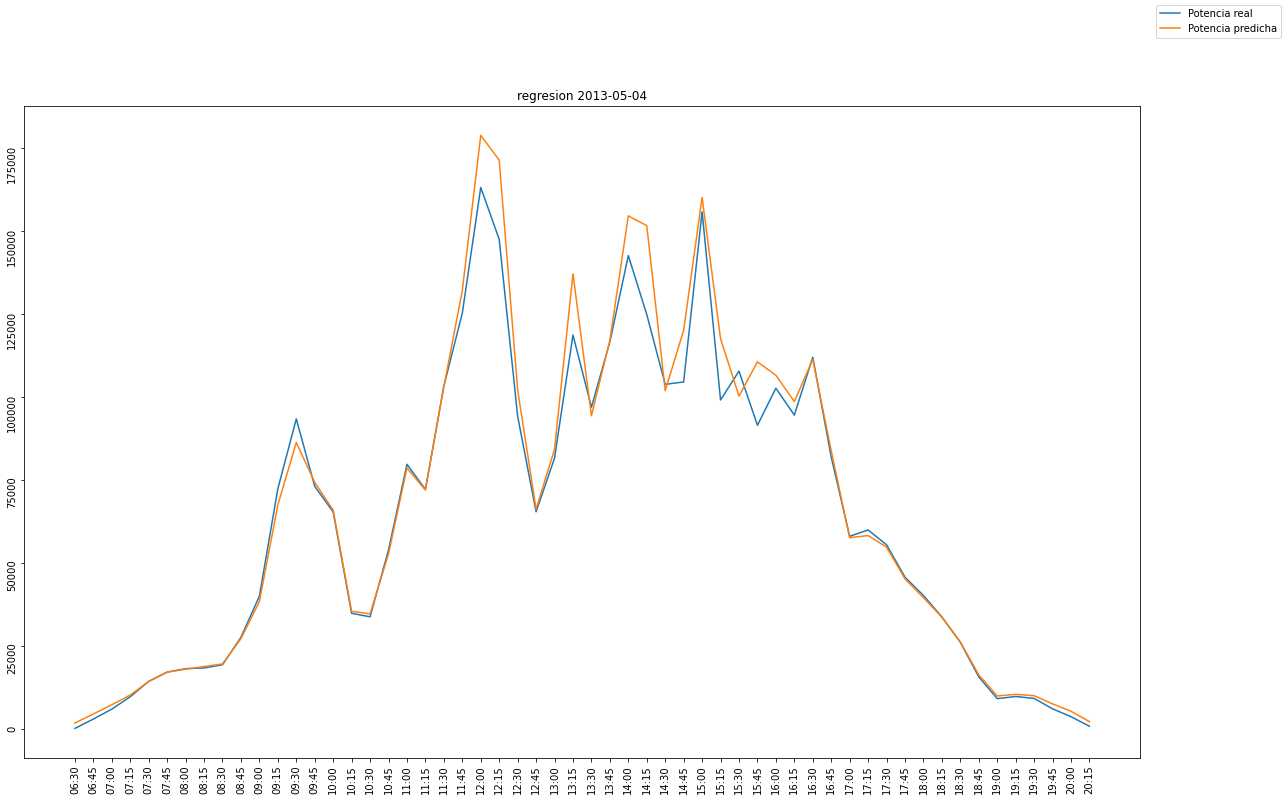

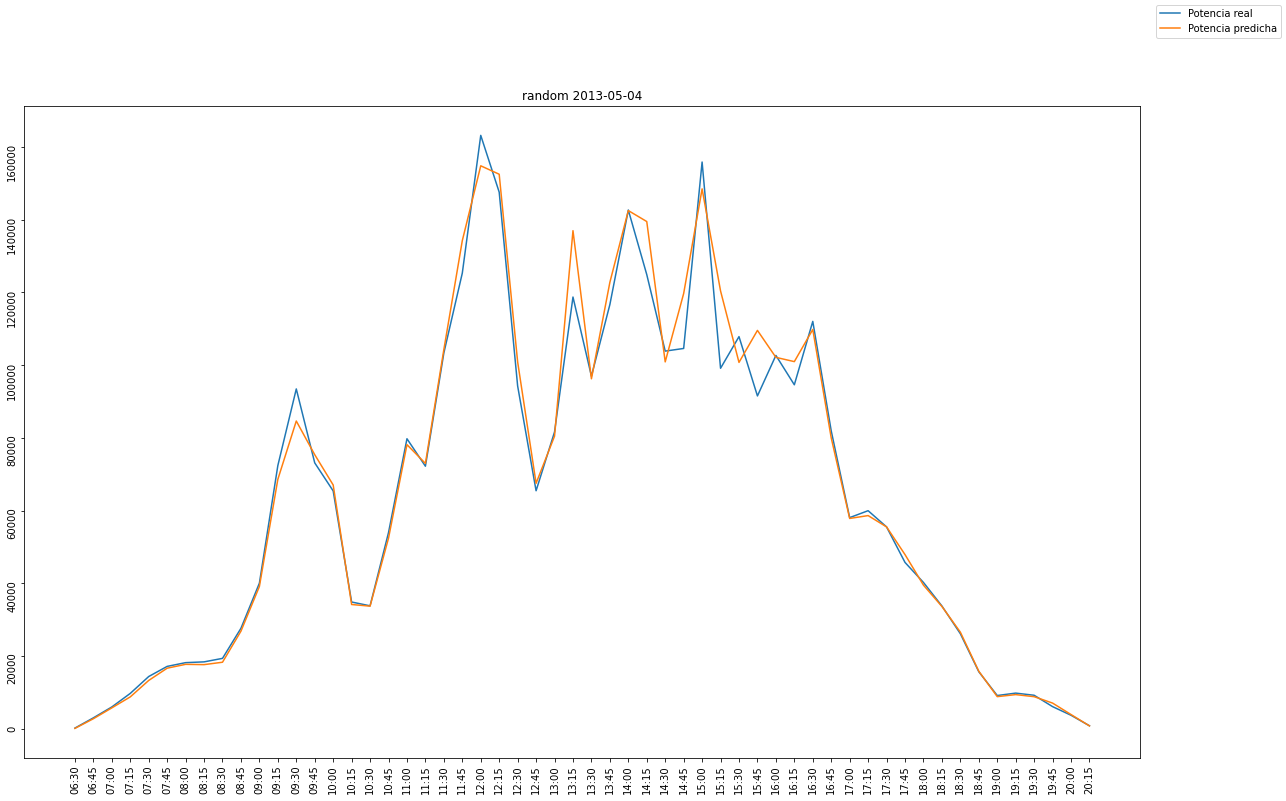

In [160]:
def predecir_un_dia(df, modelo, year, month, day):
    
    df_otro=df
    
    df_otro['Timestamp'] = pd.to_datetime(df_otro.Timestamp)
    df_otro["Año"] = df_otro["Timestamp"].dt.strftime("%Y")
    df_otro["Mes"] = df_otro["Timestamp"].dt.strftime("%m")
    df_otro["Dia"] = df_otro["Timestamp"].dt.strftime("%d")
    
    #df_otro["Hora"] = df_otro["Timestamp"].dt.strftime("%H")
    df_otro["Hora_min"] = df_otro["Timestamp"].dt.strftime("%H:%M")

    mask_antes = (df_otro.Año <= year) & (df_otro.Mes <= month) & (df_otro.Dia < day)
    mask_dia = (df_otro.Año == year) & (df_otro.Mes == month) & (df_otro.Dia == day)
    
    potencia_dia=df_otro["power"].loc[mask_dia] #Potencia REAL el dia que se va a predecir
    #hora_dia=df_otro['Hora'].loc[mask_dia] #HORAS del día que se va a predecir
    hora_dia=df_otro['Hora_min'].loc[mask_dia] #HORAS del día que se va a predecir
    
    tam_dia= len(hora_dia)
    print( "En el dia: " + year + "-" + month + "-" + day + " tenemos: " + str(tam_dia) + " muestras")
    
    #Miramos cuales son los valores de radiación y temperatura  el día que se van a predecir
    valor_poa=df_otro['poa'].loc[mask_dia]
    valor_tcell=df_otro['Tcell'].loc[mask_dia]
        
    poa_tcell=np.array([valor_poa, valor_tcell])
    #print('poa_tcell.shape' , poa_tcell.shape)
    
    poa_tcell_resized=np.transpose(poa_tcell)
    #print('poa_tcell_resized.shape' , poa_tcell_resized.shape)
    
    '''
    #ESTO NO ES UN ÚNICO VALOR, SON TODOS LOS VALORES DE POA Y TCELL EN ESE DIA A DIFERENTES HORAS.
    print( "El " + year + "-" + month + "-" + day)
    print("POA = " + str(valor_poa) + " y un TCELL = " + str(valor_tcell))
    '''
    
    #Entrenamos con los datos de antes de ese dia: mask_antes
    y = df_otro['power'].loc[mask_antes]
    x=df_otro.loc[mask_antes]
    x = x.drop(['Timestamp', 'Año' ,'Mes', 'Dia', 'Hora_min', 'power'], axis =1)
    
    print( "Desde el 2013-01-01, hasta: " + year + "-" + month + "-" + day)
    print(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=123)
    
    
    if modelo == "regresion":
        regr = linear_model.LinearRegression()
        regr.fit(x_train, y_train)
        potencia_predicha=regr.predict(poa_tcell_resized) #Potencia PREDICHA el dia que se va a predecir
        
    if modelo == "random":
        #SE UTILIZA EL MEJOR MODELO
        rf=RandomForestRegressor(n_estimators=300, max_depth=9, max_features=2,random_state = 123, n_jobs= -1)
        rf.fit(x_train, y_train)
        potencia_predicha=rf.predict(poa_tcell_resized) #Potencia PREDICHA el dia que se va a predecir
    
    #potencia_dia, hora_dia, valor_poa y valor_tcell deben tener la misma dimensión
    #La dimensión de estos es el número de muestras que tengamos el día que se desea predecir.
    
    #plotear
    fig, ax = plt.subplots(figsize=(20,12))
    
    #REAL
    ax.plot(hora_dia, potencia_dia, label="Potencia real")
    #PREDICHO
    ax.plot(hora_dia, potencia_predicha, label="Potencia predicha")
    
    ax.tick_params(labelrotation=90)
    titulo= " " + year + "-" + month + "-" + day
    ax.title.set_text(modelo + titulo)
    fig.legend(loc = 'upper right')
    
    nombre_img="predecir_un_dia_" + modelo + ".png"
    plt.savefig(path_ima + nombre_img)
        
predecir_un_dia(df1_ni, "regresion", "2013", "05", "04")
predecir_un_dia(df1_ni, "random", "2013", "05", "04")